In [5]:
import matplotlib as mpl
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from retrospective_analysis.metrics import max_error, mean_difference
from retrospective_analysis.data_loading import load_dataframe, moving_average, add_baselines
from retrospective_analysis.evaluate_scenarios import compute_metrics, compute_metrics_all_scenarios, evaluate_all_scenarios, evaluate_all_scenarios_with_dates

In [6]:
# to change with path suited for you 
results_path = 'results/'
images_path = 'images/'

# divide by 100 to express as % of normalization
new_hosp_normalization = 4200/100 
icu_normalization = 7000/100 

metrics = {"MAE": mean_absolute_error, "ME": mean_difference,  
           "Max Error": max_error}

data_location = {"2020/04/29": "https://raw.githubusercontent.com/evaluation-modelisation-covid/france/gh-pages/paper_models/data/2020_04_29/corrected_scenarios.csv",
        "2020/10/30": "processed_data/2020_10_30.csv",
        "2021/01/16": "processed_data/2021_01_16.csv",
        "2021/02/02": "processed_data/2021_02_02.csv",
        "2021/02/08": "processed_data/2021_02_08.csv",
        "2021/02/23": "processed_data/2021_02_23.csv",
        "2021/04/26": "processed_data/2021_04_26.csv",
        "2021/05/21": "processed_data/2021_05_21.csv",
        "2021/07/26": "processed_data/2021_07_26.csv",
        "2021/08/05": "processed_data/2021_08_05.csv",
        "2021/10/04": "processed_data/2021_10_04.csv",
        "2022/01/07": "processed_data/2022_01_07.csv"}

normalizations = {"2020/04/29": icu_normalization,
        "2020/10/30": icu_normalization,
        "2021/01/16": new_hosp_normalization,
        "2021/02/02": new_hosp_normalization,
        "2021/02/08": new_hosp_normalization,
        "2021/02/23": new_hosp_normalization,
        "2021/04/26": new_hosp_normalization,
        "2021/05/21": new_hosp_normalization,
        "2021/07/26": icu_normalization,
        "2021/08/05": icu_normalization,
        "2021/10/04": icu_normalization,
        "2022/01/07": icu_normalization}

scenario_endpoints = ["ICU", "ICU", "New hosp.", "New hosp.", "New hosp.",
                      "New hosp.", "New hosp.", "New hosp.",
                      "ICU", "ICU", "ICU", "ICU"]
endpoints_normalizations = {"ICU": 7000/100, 
                            "New hosp.": 4200/100}
"""
data_location = {"2020/04/28": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_04_28_ICU_error.csv",
        "2020/10/30": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_10_30_ICU_error.csv",
        "2021/01/16": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_01_16_new_hosp_error.csv",
        "2021/02/02": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_02_new_hosp_error.csv",
        "2021/02/08": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_08_new_hosp_error.csv",
        "2021/02/23": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_23_new_hosp",
        "2021/04/26": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_04_26_new_hosp.csv",
        "2021/05/21": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_05_21_new_hosp.csv",
        "2021/05/21": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_05_21_ICU.csv",
        "2021/07/26": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_07_26_ICU.csv",
        "2021/07/26": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_07_26_new_hosp.csv",
        "2021/08/05": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_08_05_new_hosp.csv",
        "2021/08/05": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_08_05_ICU.csv",
        "2021/10/04": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_10_04_new_hosp.csv",
        "2022/01/07": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2022_01_07_new_hosp.csv",
        "2022/01/07": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2022_01_07_ICU.csv"}

normalizations = {"2020/04/28": icu_normalization,
        "2020/10/30": icu_normalization,
        "2021/01/16": new_hosp_normalization,
        "2021/02/02": new_hosp_normalization,
        "2021/02/08": new_hosp_normalization,
        "2021/02/23": new_hosp_normalization,
        "2021/04/26": new_hosp_normalization,
        "2021/05/21": new_hosp_normalization,
        "2021/05/21": icu_normalization,
        "2021/07/26": icu_normalization,
        "2021/07/26": new_hosp_normalization,
        "2021/08/05": new_hosp_normalization,
        "2021/08/05": icu_normalization,
        "2021/10/04": new_hosp_normalization,
        "2022/01/07": new_hosp_normalization,
        "2022/01/07": icu_normalization}
"""

'\ndata_location = {"2020/04/28": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_04_28_ICU_error.csv",\n        "2020/10/30": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_10_30_ICU_error.csv",\n        "2021/01/16": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_01_16_new_hosp_error.csv",\n        "2021/02/02": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_02_new_hosp_error.csv",\n        "2021/02/08": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_08_new_hosp_error.csv",\n        "2021/02/23": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_23_new_hosp",\n        "2021/04/26": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_04_26_new_hosp.csv",\n        "2021/05/21": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_05_21_new_hosp.csv",\n      

In [7]:
# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize' : 40,
    'axes.labelsize' : 40,
    'legend.fontsize' : 40,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 40,
            'axes.labelsize' : 40,
            'legend.fontsize' : 40,
            'xtick.labelsize' : 40,
            'ytick.labelsize' : 40,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})

%matplotlib inline

In [8]:
results = evaluate_all_scenarios(data_location, metrics=metrics, normalizations=normalizations)
with open(results_path + 'global_evaluation.csv', 'w', encoding = 'utf-8-sig') as f:
  results.to_csv(f)
results

KeyError: ['min', 'med', 'max']

In [ ]:
results_with_dates = evaluate_all_scenarios_with_dates(data_location, metrics=metrics, normalizations=normalizations)
with open(results_path + 'global_evaluation.csv', 'w', encoding = 'utf-8-sig') as f:
  results_with_dates.to_csv(f)
results_with_dates

,Scenario,Scenario type,Average uncertainty (beds),Max uncertainty,Global accuracy,"MAE (median, beds)",Period
"Scenario: 2020/04/29, period: 0 days - 14 days",2020/04/29,ICU,0.0,0.0,12.9,98.1,0 days - 14 days
"Scenario: 2020/04/29, period: 14 days - 28 days",2020/04/29,ICU,0.0,0.0,12.9,122.3,14 days - 28 days
"Scenario: 2020/04/29, period: 28 days - 42 days",2020/04/29,ICU,155.4,487.0,12.9,72.3,28 days - 42 days
"Scenario: 2020/04/29, period: 42 days - 56 days",2020/04/29,ICU,1441.4,2142.0,12.9,310.6,42 days - 56 days
"Scenario: 2020/10/30, period: 0 days - 14 days",2020/10/30,ICU,437.5,1202.0,37.8,780.5,0 days - 14 days
"Scenario: 2020/10/30, period: 14 days - 28 days",2020/10/30,ICU,2955.6,4531.0,37.8,1871.1,14 days - 28 days
"Scenario: 2020/10/30, period: 28 days - 42 days",2020/10/30,ICU,5881.1,6793.0,37.8,2364.2,28 days - 42 days
"Scenario: 2021/02/08, period: 0 days - 14 days",2021/02/08,New hosp.,678.5,1054.0,0.0,721.6,0 days - 14 days
"Scenario: 2021/02/23, period: 0 days - 14 days",2021/02/23,New hosp.,89.1,296.0,56.8,217.1,0 days - 14 days
"Scenario: 2021/02/23, period: 14 days - 28 days",2021/02/23,New hosp.,771.3,1242.0,56.8,140.1,14 days - 28 days


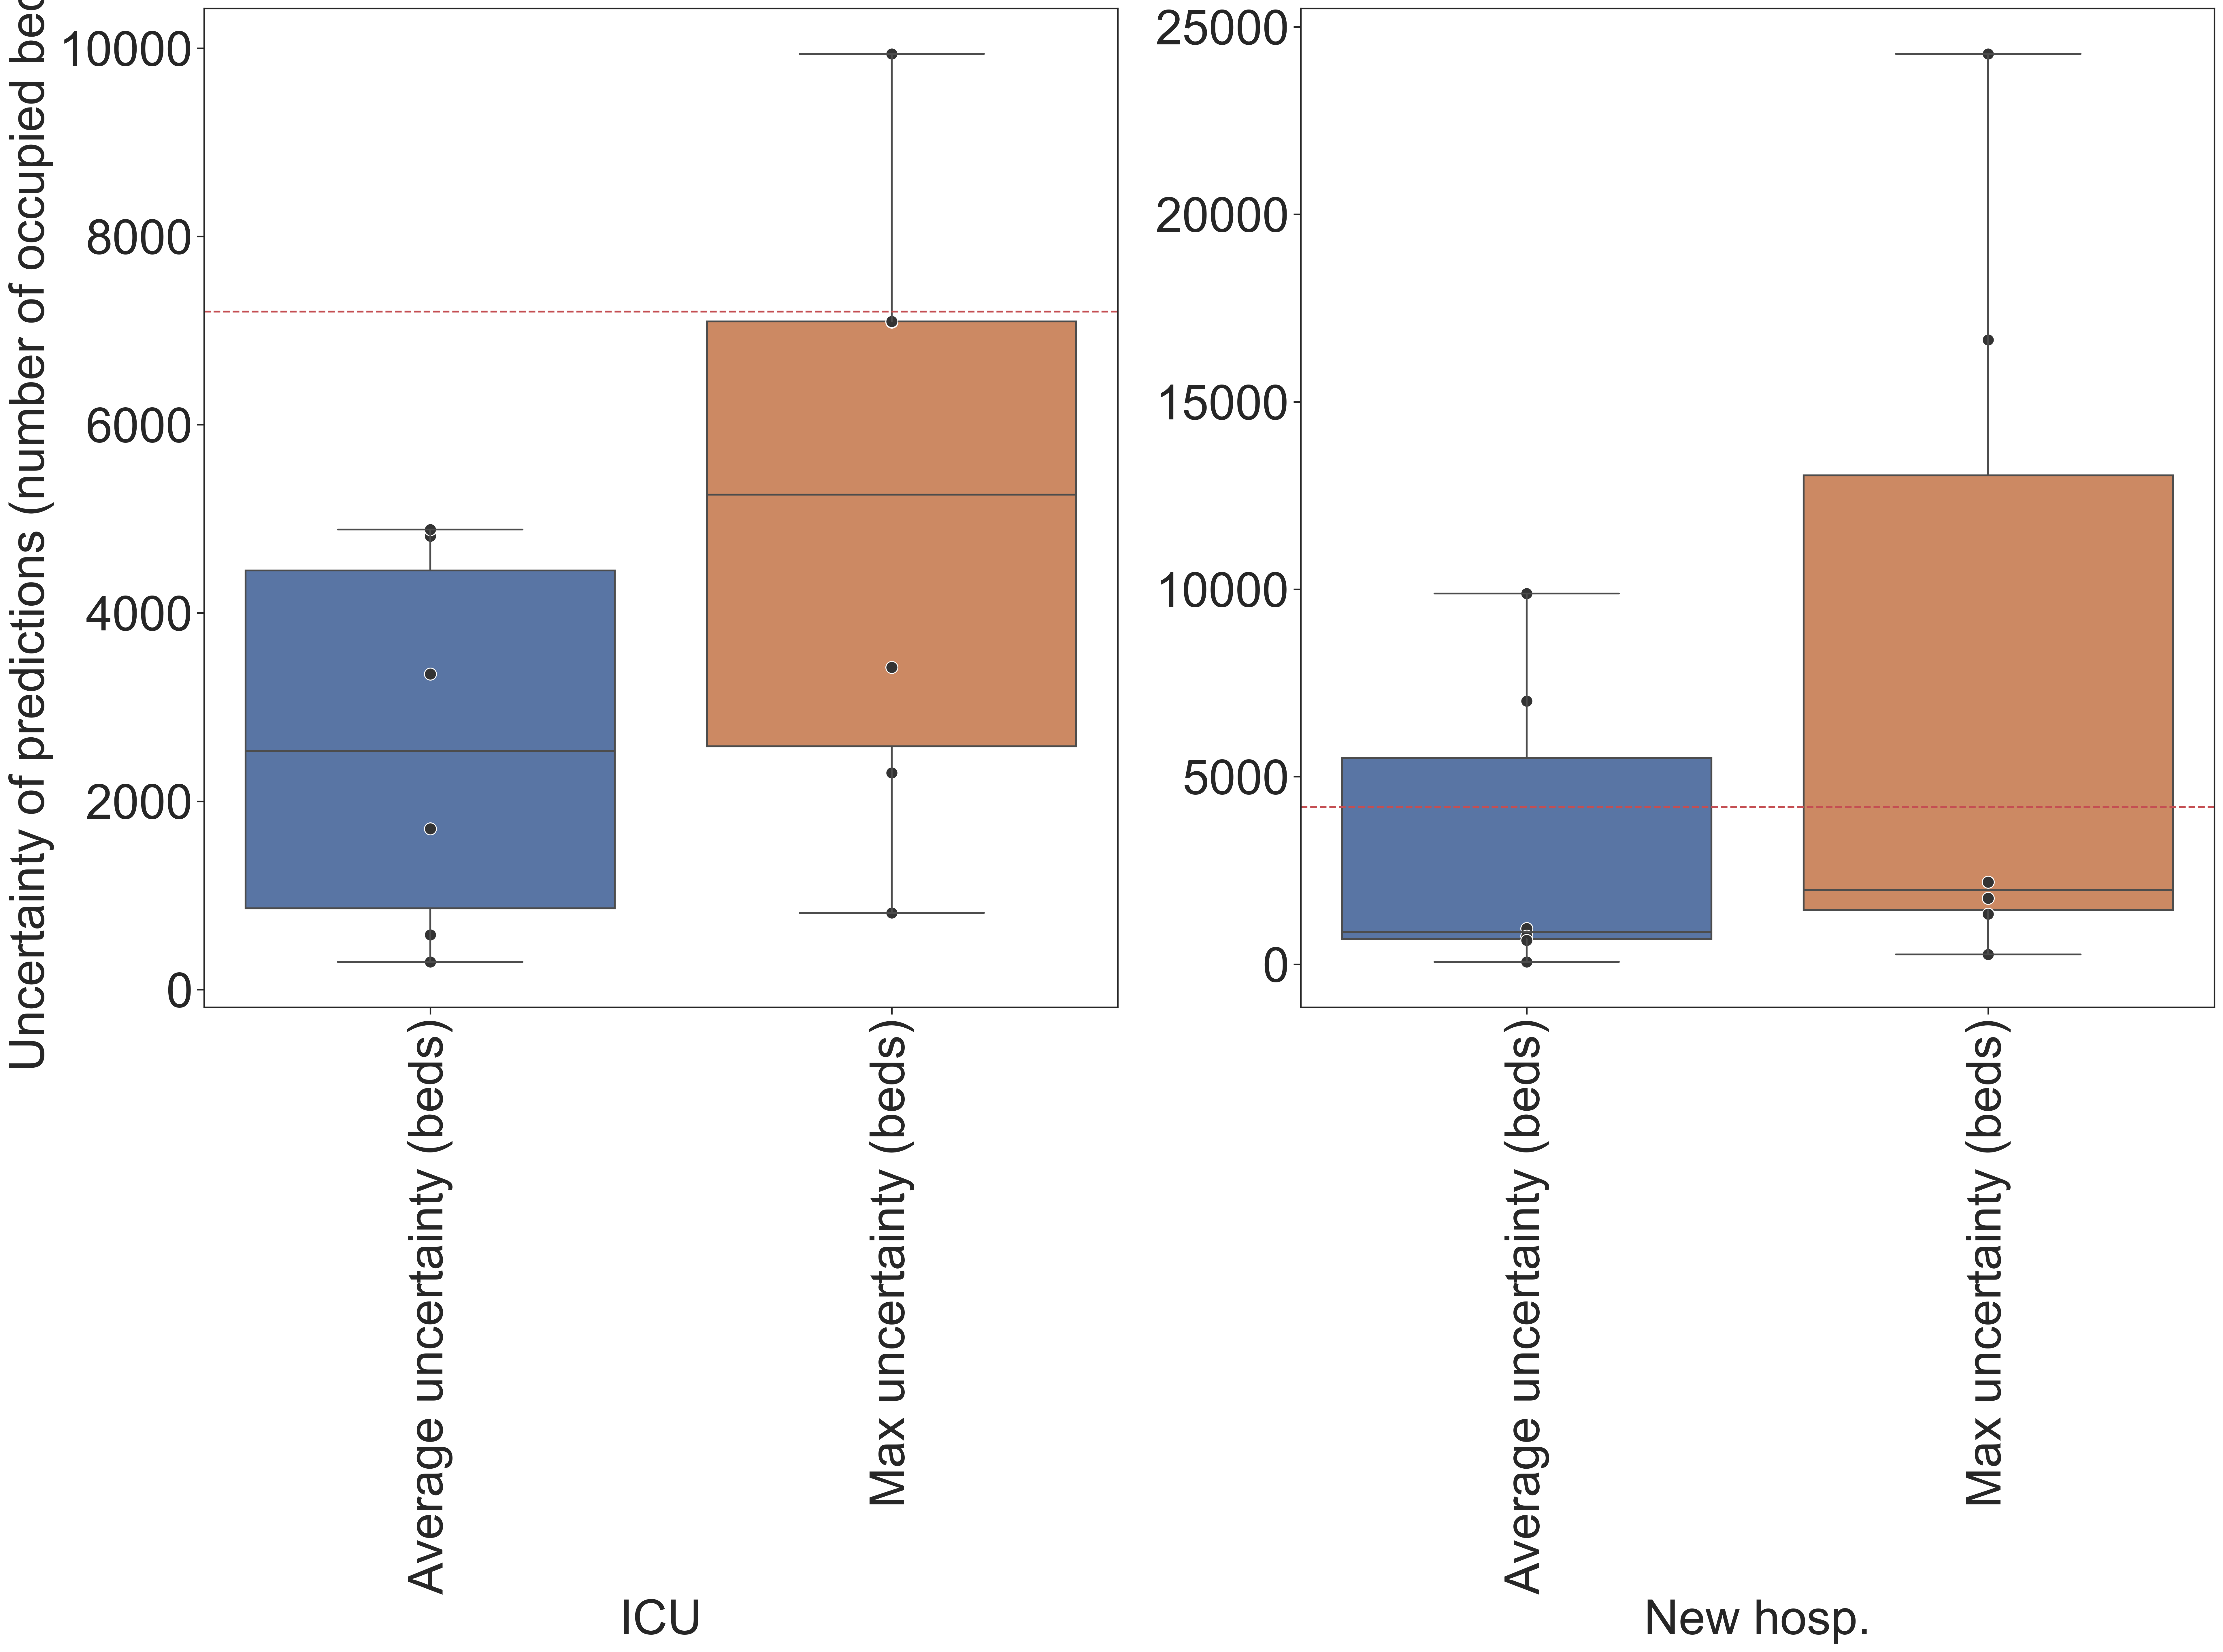

In [ ]:
endpoints_normalizations = {"ICU": 7000/100, 
                            "New hosp.": 4200/100}

display_df = results.copy()
endpoints = ["ICU", "ICU", "New hosp.",  "New hosp.",  "New hosp.",  "New hosp.",  "New hosp.",  "New hosp.", "ICU", "ICU", "ICU", "ICU"]
display_df["endpoints"] = endpoints
display_df["Average uncertainty (beds)"] = display_df["Average uncertainty"].values*np.array([endpoints_normalizations[x] for x in endpoints])
display_df["Max uncertainty (beds)"] = display_df["Max uncertainty"].values*np.array([endpoints_normalizations[x] for x in endpoints])

display_df = display_df.melt(id_vars='endpoints', value_vars=['Average uncertainty (beds)', "Max uncertainty (beds)"])

fig, axes = plt.subplots(figsize=(30, 15), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape

h1 = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0])
sns.scatterplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0], s=100, color=".2")
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("ICU")
axes[0].set_ylabel("Uncertainty of predictions (number of occupied beds)")
axes[0].axhline(7200, c='r', linestyle='--')
axes[0].tick_params(axis='x', rotation=90)

h2 = sns.boxplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1])
sns.scatterplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1], s=100, color=".2")

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("New hosp.")
axes[1].axhline(4200, c='r', linestyle='--')
axes[1].tick_params(axis='x', rotation=90)

plt.ylabel("")
    
fig_path = images_path + '/uncertainties_global.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

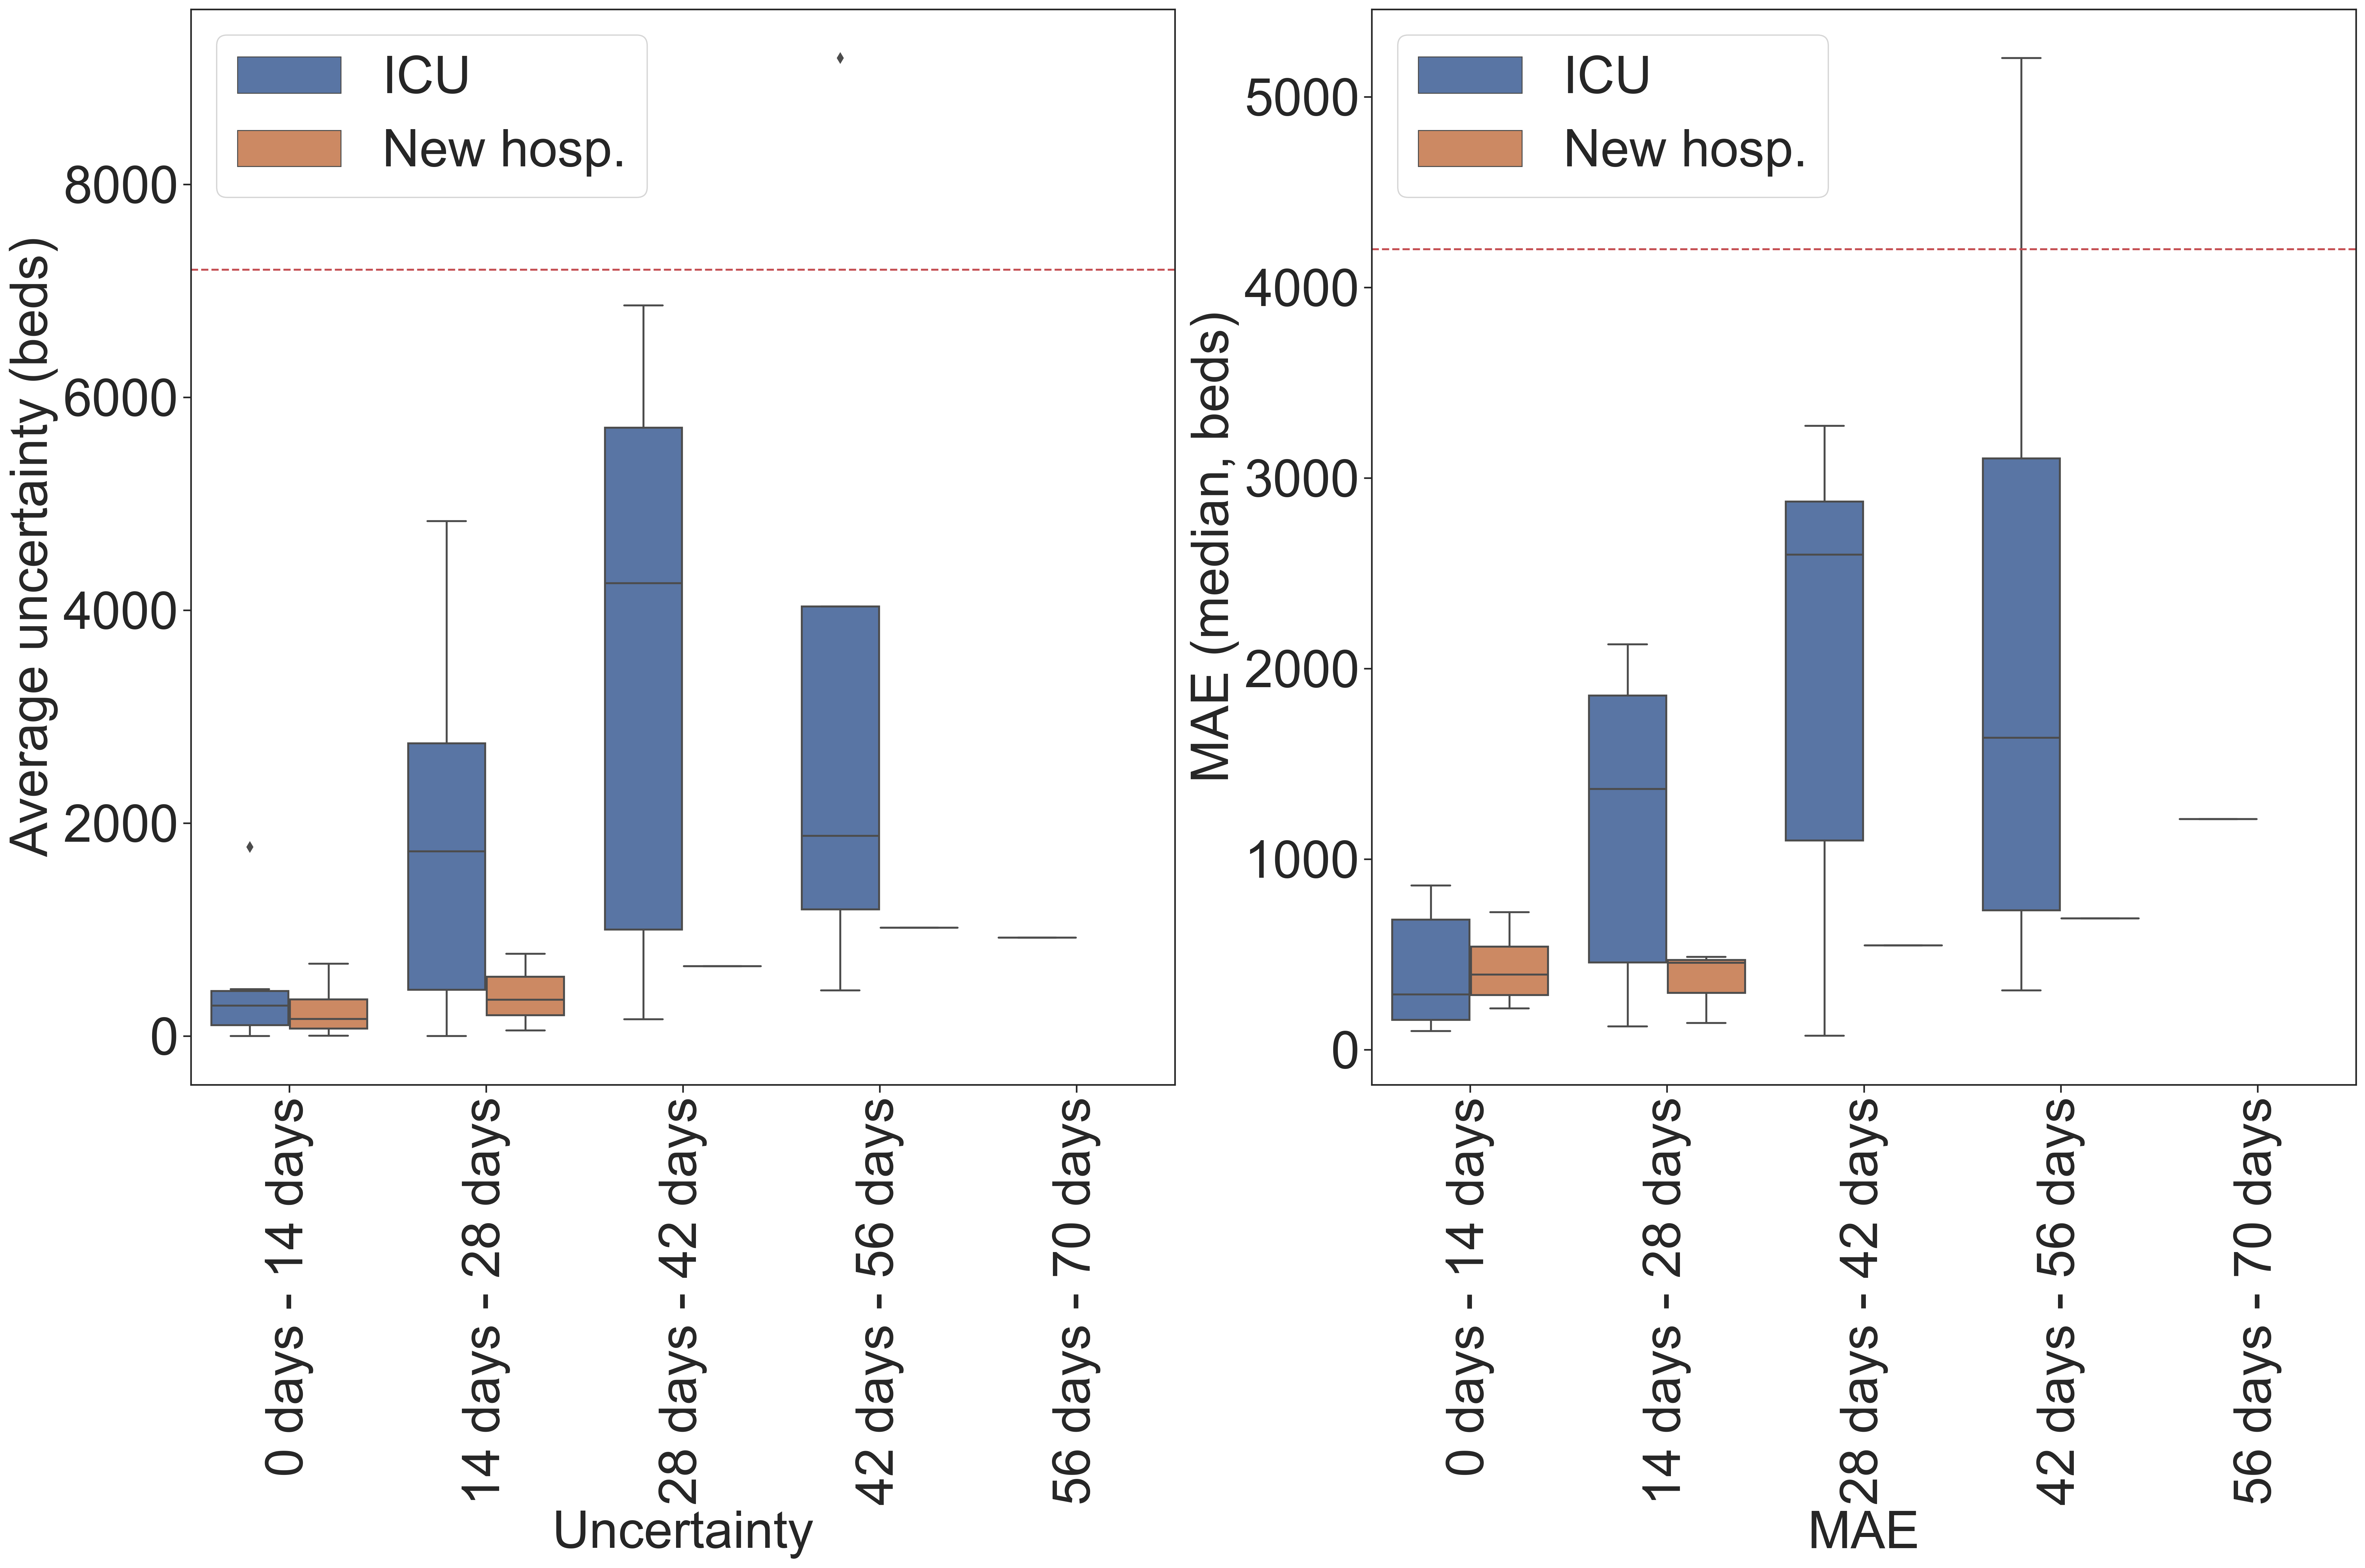

In [ ]:
display_df = results_with_dates.copy()


fig, axes = plt.subplots(figsize=(30, 15), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape

h1 = sns.boxplot(data=display_df, y='Average uncertainty (beds)', x='Period', hue = "Scenario type",  ax=axes[0])
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("Uncertainty")
axes[0].set_ylabel("Average uncertainty (beds)")
axes[0].axhline(7200, c='r', linestyle='--')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='')

h1 = sns.boxplot(data=display_df, y='MAE (median, beds)', x='Period', hue = "Scenario type",  ax=axes[1])
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("MAE")
axes[1].set_ylabel("MAE (median, beds)")
axes[1].axhline(4200, c='r', linestyle='--')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='')

    
fig_path = images_path + '/time_evolution.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [ ]:
data_location_self_assessment = {'2022/01/07' : 'processed_data/improper_comparison_Jan_07_2022.csv',
                                 '2021/02/02' : 'processed_data/improper_comparison_Feb_02_2022.csv'}

results_self_assessment = evaluate_all_scenarios(data_location_self_assessment, metrics=metrics, normalizations={'2022/01/07': 70.0, '2021/02/02': 70.0})

dates = list(normalizations.keys())

endpoints = ["ICU beds", "ICU beds", "Hospital admissions",  "Hospital admissions",  "Hospital admissions",  "Hospital admissions",  "Hospital admissions",  "Hospital admissions", "ICU beds", "ICU beds", "ICU beds", "ICU beds", "ICU beds", "ICU beds"]
public = ["No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"]
legitimate_comparisons = ["Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No"]

dates.extend(['2022/01/07', '2021/02/02'])

df = pd.DataFrame(zip(dates, endpoints, public, legitimate_comparisons), columns =['Date', 'Endpoint', 'Public', 'Valid assessment'])
df["Self-assessment by modelers"] = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes']
mape = list(results['MAPE (median)'].values)
mape += list(results_self_assessment['MAPE (median)'].values)

mape_optimist = list(results['MAPE (optimist)'].values)
mape_optimist += list(results_self_assessment['MAPE (optimist)'].values)

mape_pessimist = list(results['MAPE (pessimist)'].values)
mape_pessimist += list(results_self_assessment['MAPE (pessimist)'].values)

df["MAPE (median)"] = mape
df["MAPE (optimist)"] = mape_optimist
df["MAPE (pessimist)"] = mape_pessimist

print(df.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{llllllrrr}
\toprule
{} &        Date &             Endpoint & Public & Valid assessment & Self-assessment by modelers &  MAPE (median) &  MAPE (optimist) &  MAPE (pessimist) \\
\midrule
0  &  2020/04/29 &             ICU beds &     No &              Yes &                          No &           50.0 &             19.3 &             188.5 \\
1  &  2020/10/30 &             ICU beds &     No &              Yes &                          No &           47.2 &             15.2 &              96.4 \\
2  &  2021/01/16 &  Hospital admissions &    Yes &              Yes &                          No &           62.7 &             13.9 &             119.2 \\
3  &  2021/02/02 &  Hospital admissions &    Yes &              Yes &                          No &           58.7 &             16.6 &             100.8 \\
4  &  2021/02/08 &  Hospital admissions &    Yes &              Yes &                          No &           64.7 &             26.8 &             102.7 \\
5  &  2021/02

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_9414/3291160750.py:29: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(


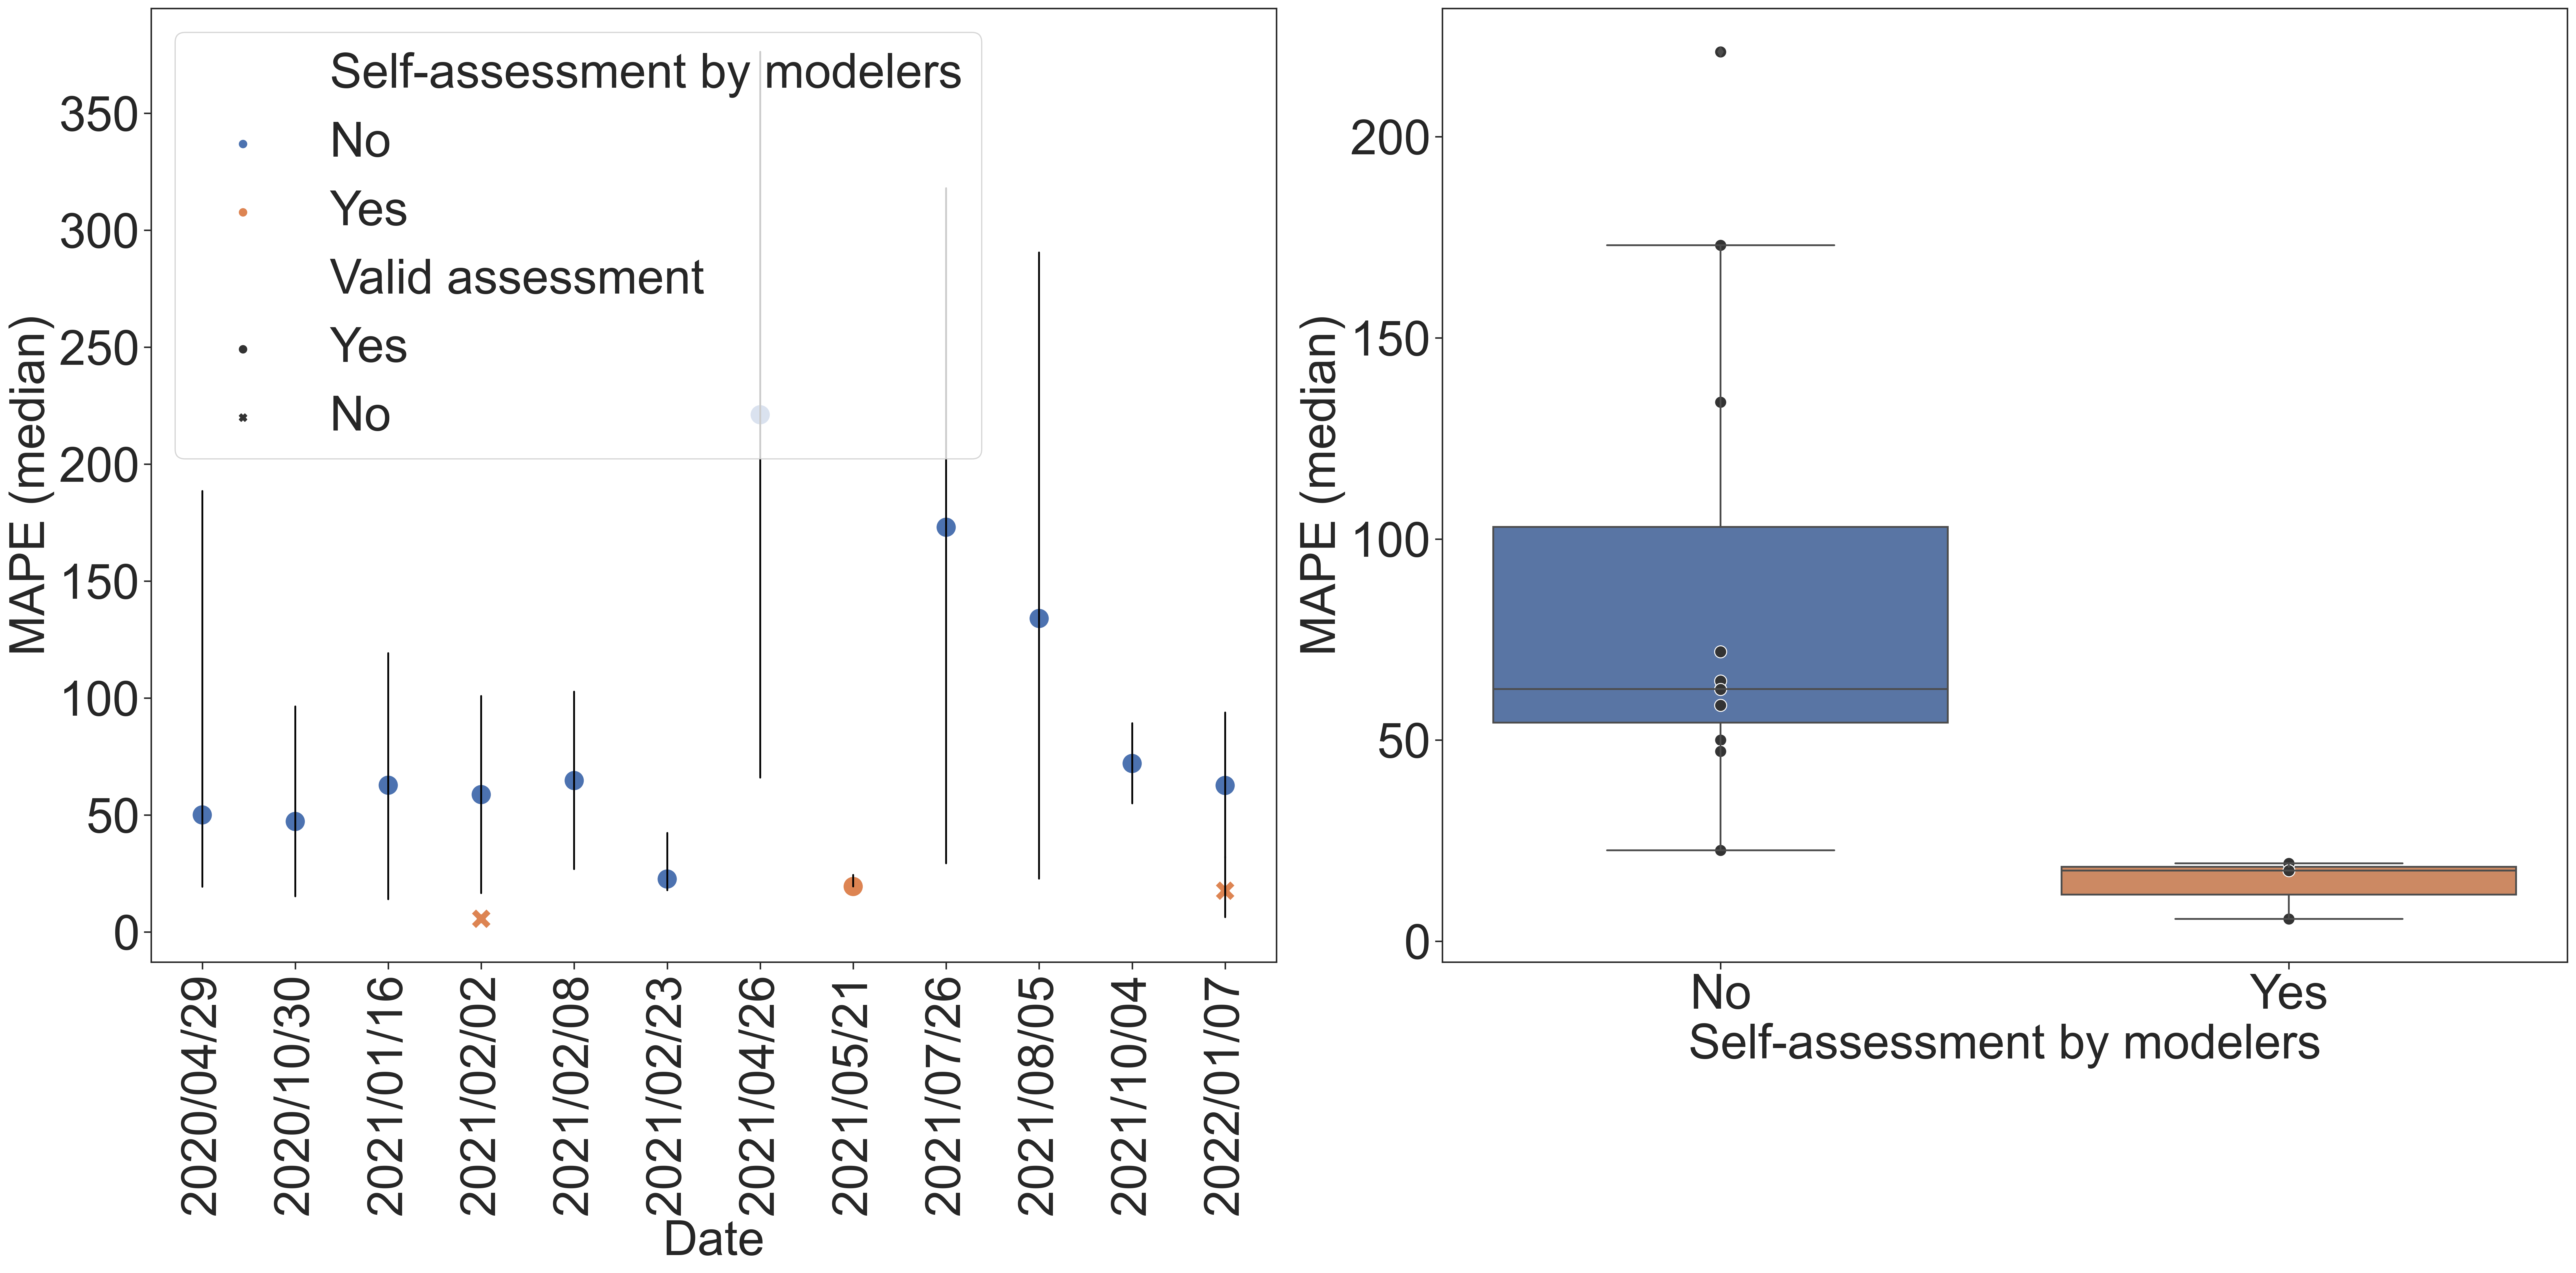

In [ ]:

fig, axes = plt.subplots(figsize=(30, 15), ncols=2, nrows=1)

for index, row in df.iterrows():
    axes[0].plot([row['Date'], row['Date']], [row['MAPE (pessimist)'], row['MAPE (optimist)']], color='black')
g = sns.scatterplot(x="Date", y="MAPE (median)",
             hue="Self-assessment by modelers", style="Valid assessment",
             data=df, ax=axes[0], s=300)
sns.move_legend(g, "upper left")

axes[0].tick_params(axis='x', rotation=90)


h = sns.boxplot(y="MAPE (median)",
             x="Self-assessment by modelers",
             data=df, ax=axes[1])
sns.scatterplot(y="MAPE (median)",
             x="Self-assessment by modelers",
             data=df, ax=axes[1], s=100, color=".2")

plt.tight_layout()

fig_path = images_path + '/self_assessment_bias.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')


In [ ]:
print(results.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format))  

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Average uncertainty &  Max uncertainty &  Global accuracy &  MAE (median) &  MAPE (median) &  MAPE (optimist) &  MAPE (pessimist) \\
\midrule
Scenario: 2020/04/29 &                  8.3 &             32.9 &             12.9 &           2.9 &           50.0 &             19.3 &             188.5 \\
Scenario: 2020/10/30 &                 47.9 &            101.3 &             37.8 &          24.5 &           47.2 &             15.2 &              96.4 \\
Scenario: 2021/01/16 &                235.3 &            578.1 &             28.6 &         124.7 &           62.7 &             13.9 &             119.2 \\
Scenario: 2021/02/02 &                167.0 &            396.5 &              0.0 &         116.4 &           58.7 &             16.6 &             100.8 \\
Scenario: 2021/02/08 &                 22.7 &             41.9 &              0.0 &          19.3 &           64.7 &             26.8 &             102.7 \\
Scenario: 2021/02/23 &          

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_9414/852571829.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results.to_latex(
